## Final Project Submission

Please fill out:
* Student name: Joseline Apiyo Odhiambo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel G.
* Blog post URL: https://github.com/Jodhiamboapiyo/Group15_project/blob/main/Work/Josi.ipynb

## INTRODUCTION 

The real estate market is a dynamic and influential sector that significantly impacts the economy and individuals' lives. In the context of residential properties, understanding the factors that affect housing prices is crucial for buyers, sellers, real estate agents, and investors. By analyzing data on various features of houses, we can identify the key determinants of house prices and provide actionable insights to stakeholders.


This project aims to leverage statistical analysis and machine learning techniques to uncover the relationships between house features and their prices. The dataset includes various attributes such as the number of bedrooms, bathrooms, square footage, grade, and more. By exploring these features, we aim to predict house prices and provide recommendations for maximizing property value during renovations.

## Objectives


**Data Exploration and Cleaning:**

Conduct an initial exploration of the dataset to understand its structure and contents.
Identify and handle missing or inconsistent data to ensure a clean dataset for analysis.
Feature Selection and Engineering:

**Determine which features are most relevant to house pricing.**
Create new features or transform existing ones if necessary to improve the predictive power of the model.
Statistical Analysis:

**Perform exploratory data analysis (EDA) to identify trends, correlations, and patterns in the data.**
Use statistical tests to validate the significance of relationships between features and house prices.
Model Building and Evaluation:

**Develop regression models to predict house prices based on the selected features.**
Evaluate the models using appropriate metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


##Insights and Recommendations:

*Interpret the results of the models to understand how different features impact house prices.*
Provide actionable recommendations for homeowners and real estate professionals on which features to focus on during renovations to maximize property value.
Business Impact:

*Assess the potential financial impact of changes in house features on overall pricing.*
Offer strategic advice to real estate companies on investment and renovation decisions to enhance market competitiveness.
By achieving these objectives, the project aims to contribute valuable insights into the real estate market, helping stakeholders make informed decisions that can lead to better financial outcomes and optimized property investments.

**Importing the required libraries**

In [1]:
import itertools
import numpy as np
import pandas as pd
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
import math

In [2]:
df = pd.read_csv('D:\PROJECT\phase2_project\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Summary statistics**

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Features dropped**

In [5]:
#Columns to drop
df = df.drop(columns=[
    'date', 'view', 'sqft_above', 'sqft_basement', 'id',
    'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
])

# Print the remaining columns to verify
print(df.columns)



Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')


In [6]:
#Identfying features with Null values.
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

*The waterfont value is the only feature with Null values*


**A pair plot to see the type of relationship between te features**

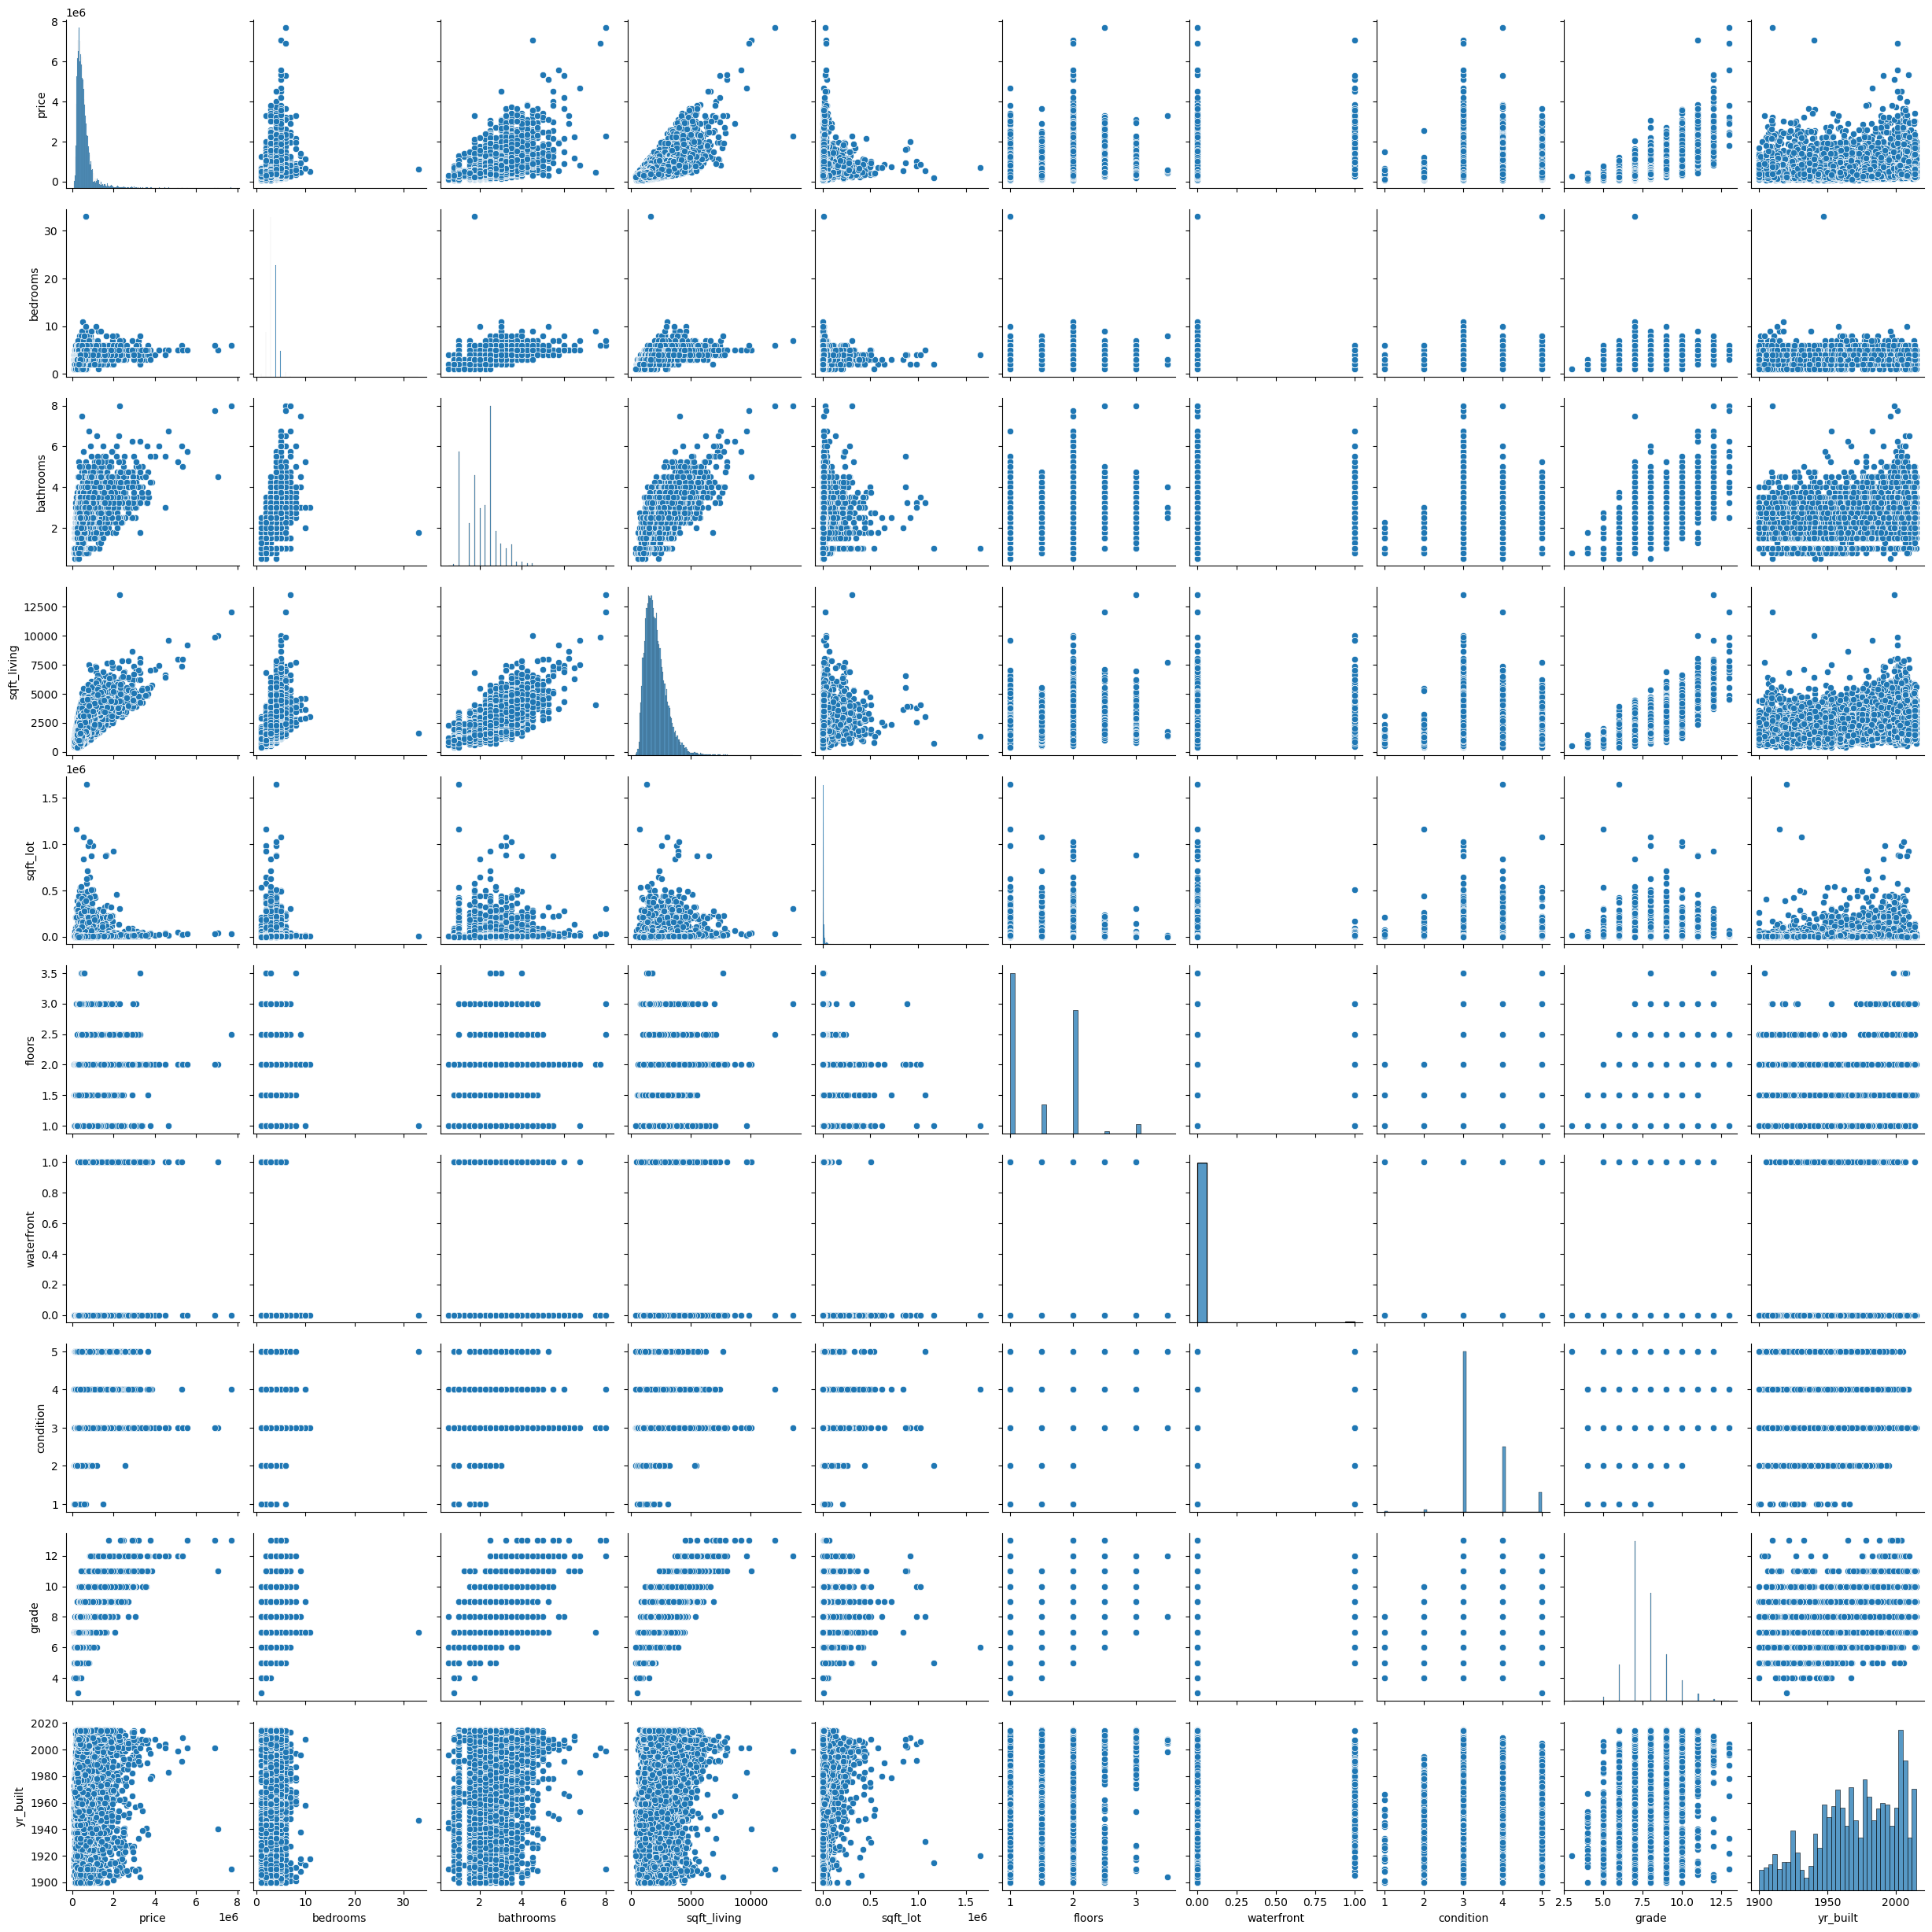

In [8]:
sns.pairplot(data=df)
plt.show()

*Now let us have a correlation table between the features in the table*.

*Here is the list of the features we are working with*



In [9]:

#Correlation between the features
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,-0.264075,0.458794,0.489193
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.361592,0.447865,1.000000


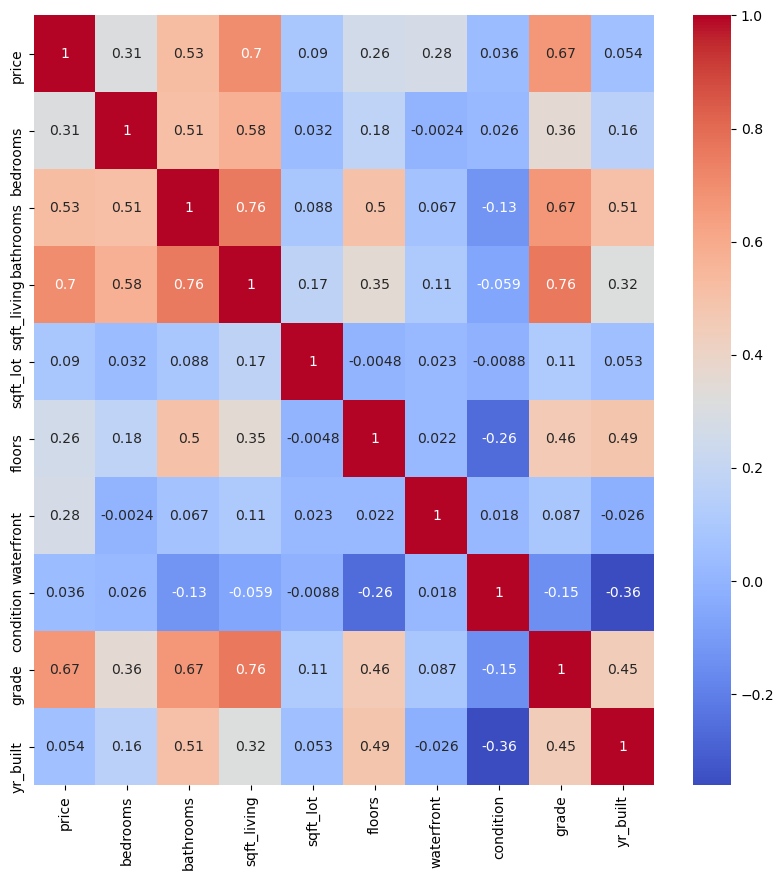

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

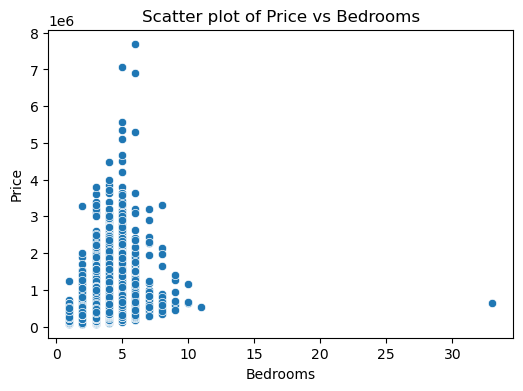

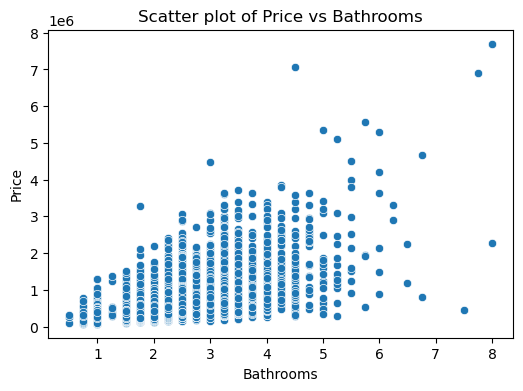

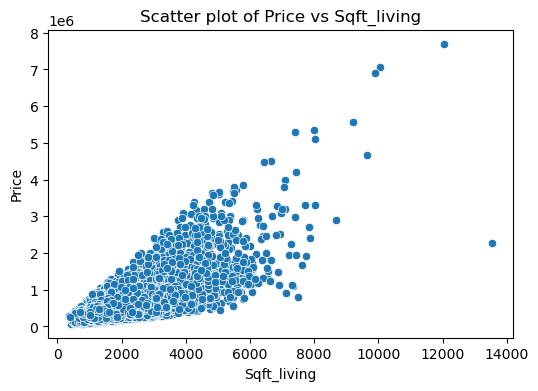

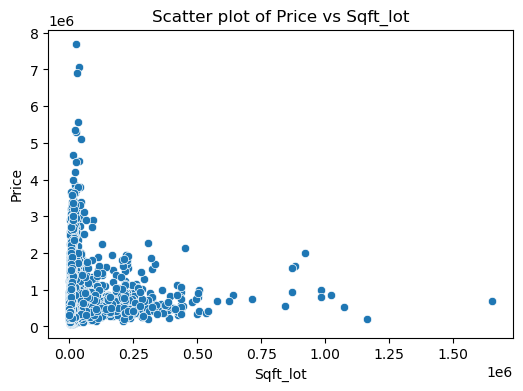

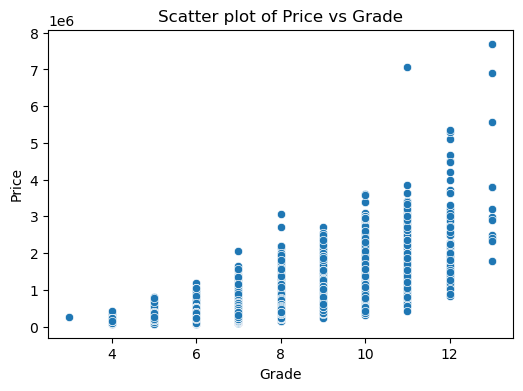

In [11]:
# Select the relevant columns
selected_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
df_selected = df[selected_columns]

#Create scatterplots for 'price' against each selected feature
columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_selected, x=column, y='price')
    plt.title(f'Scatter plot of Price vs {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.show()

**BoxPlot Analysis**

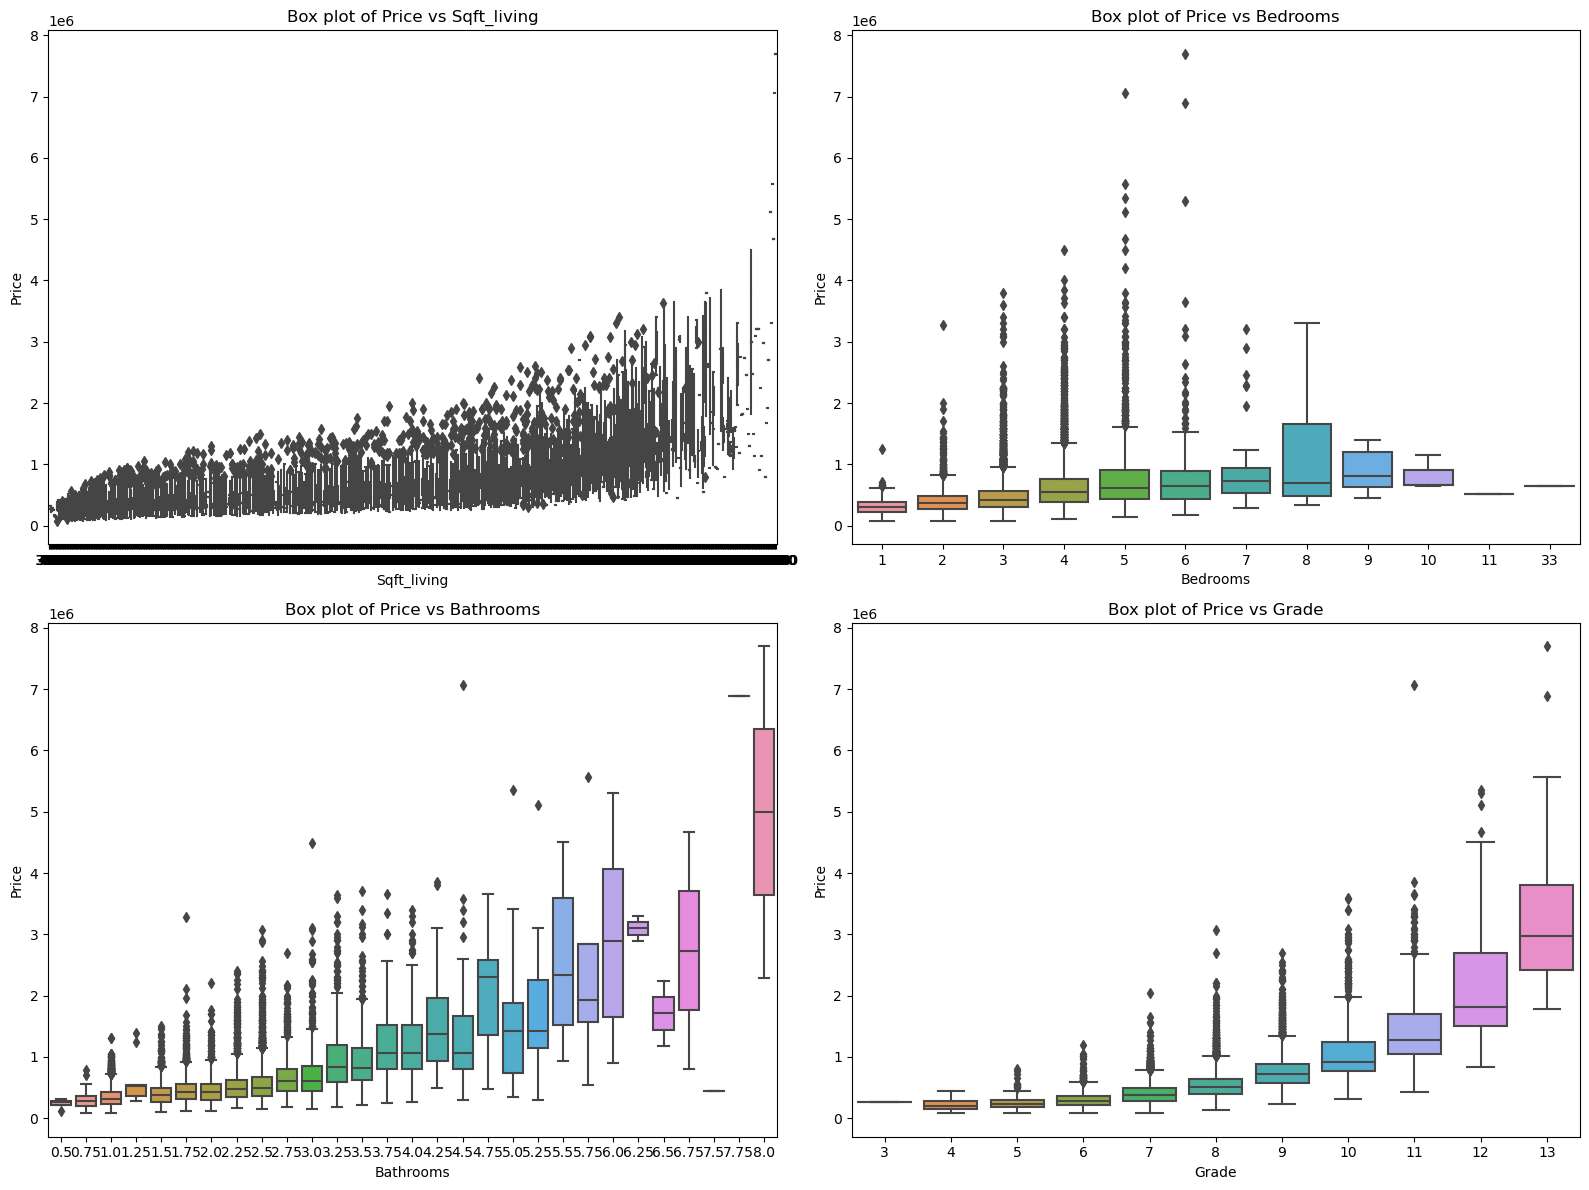

In [15]:
# List of columns to plot against 'price'
columns_to_plot = ['sqft_living', 'bedrooms', 'bathrooms', 'grade']

#subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df_selected, x=column, y='price', ax=axes[i])
    axes[i].set_title(f'Box plot of Price vs {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

**CHART ANALYSIS**

From the scatterplot and the box plot analysis, it clearly shows that features such as Grade, Bathrooms, sqft living and bedrooms highly correlates.

This means that the analysed features has a positive impact on the pricing of the housing.

A good example is the 'Bedrooms' feature, we can see that the best number of bedrooms to have in a house either 4 or 5.
The higher the number of bedrooms does not equate to a higher price of the house.

This is however, different with the 'Grade' of the house. The higher the grade, indicates a higher pricing of the house.

2.0 **SPLITTING THE DATA**

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

We will later train the data using OLS for simple linear regression and multiple linear regression.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split


In [18]:
#Starting with atleast one feature and see the data output

x = df['sqft_living']
x

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

**Using OLS for a single variable regression also known as the "Simple Linear Regression".**

In [19]:
import pandas as pd
from statsmodels.formula.api import ols

In [20]:
# Fitted OLS model with the new column names
predictor1 = ols('price ~ sqft_living', data=df).fit()

#  summary of the model
predictor1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:58:35   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The OLS regression results indicate how well the sqft_living feature explains the variation in house prices. Here are some key insights.**

**Model Performance**

R-squared (0.493): This indicates that approximately 49.3% of the variance in house prices can be explained by the sqft_living feature. While this is a substantial proportion, it also suggests that there are other factors affecting house prices not captured by this model. Adj. R-squared (0.493): The adjusted R-squared value is the same as the R-squared, suggesting that adding more variables would not necessarily improve the model fit significantly.

**Statistical Significance F-statistic (2.097e+04) and Prob (F-statistic) (0.00)**: 

The very high F-statistic and the corresponding p-value of 0.00 indicate that the model is statistically significant, meaning the relationship between sqft_living and house prices is not due to random chance. t-statistic for sqft_living (144.819) and p-value (0.000): The t-statistic is very high, and the p-value is extremely low (0.00), indicating that sqft_living is a statistically significant predictor of house prices.

**Coefficients Intercept (-4.399e+04)**:

 This is the expected value of the dependent variable (house price) when all independent variables are zero.
 
Although having a negative intercept doesn't have a real-world interpretation, it is a part of the linear regression equation. Coefficient for sqft_living (280.8630): For each additional square foot of living space, the house price is expected to increase by approximately $280.86, holding all other factors constant.

**Business Insights Focus on Increasing sqft_living**: 

Increasing the living space (square footage) of houses can significantly increase their prices. This feature is the most significant predictor of house prices in your model. 

Other Factors: Since the R-squared value is 0.493, consider adding other relevant features (like location, number of bedrooms/bathrooms, condition, grade, etc.) to the model to explain more of the variance in house prices. Renovation Strategy: When renovating houses, focus on expanding the living area, as it has the highest impact on increasing the price. However, also consider other features that may not have been included in this analysis.

**The rest of the features now**

In [21]:
x = df[['sqft_living','grade','bathrooms', 'bedrooms']]
y = df['price']

In [22]:
x.head()
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

**Training the Model with multivariable regression using Scikit Learn**

In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
lm = LinearRegression()

In [28]:
lm.fit(x_train, y_train)

LinearRegression()

In [29]:
lm.coef_

array([   221.29865771,  99843.16223334, -21866.96646553, -40466.81419321])

In [30]:
# r squared
lm.score(x, y)

0.5434823993345687

In [31]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['coefficient'])
cdf

,coefficient
sqft_living,221.298658
grade,99843.162233
bathrooms,-21866.966466
bedrooms,-40466.814193


In [32]:
predictions = lm.predict(x_test)
predictions

array([147642.50442842, 288232.87689934, 382239.1410158 , ...,
       391592.69347725, 628941.4789508 , 312558.23250813])

**Training the model with multivariable regression using OLS**

In [33]:
# Fitted OLS model with the new column names
predictor2 = ols('price ~ sqft_living + bathrooms + bedrooms + grade',  data=df).fit()

# Print the summary of the model
predictor2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:59:35   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Predicting Test Data**

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model.

The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [34]:
predictions = lm.predict(x_test)

**Scatterplot of actual values of y vs predicted values**

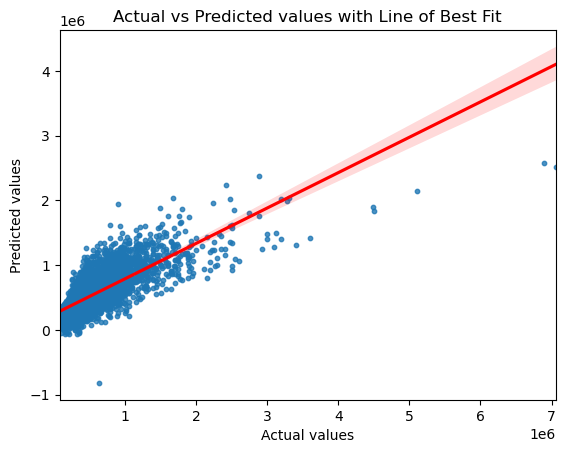

In [35]:
#DataFrame for better visualization with seaborn
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Scatter plot with the line of best fit
sns.regplot(x='Actual', y='Predicted', data=results_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.title('Actual vs Predicted values with Line of Best Fit')
plt.show()

**From the above graphical represenation, it is clear that the model is doing a fairly good job in the prediction.

There is a positive output between the actual values and the predicted variables**

**Model Evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [39]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 160373.00327320994
Mean Squared Error: 61105313528.55382
Root Mean Squared Error: 247194.88977030618


**Residuals**

<AxesSubplot:xlabel='price', ylabel='Density'>

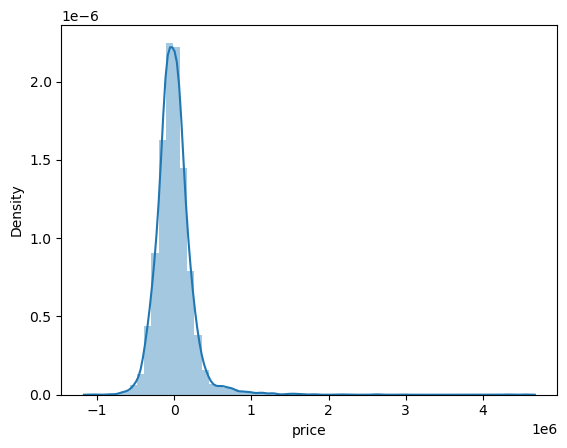

In [40]:
residuals = y_test-predictions
sns.distplot(residuals, bins=60)

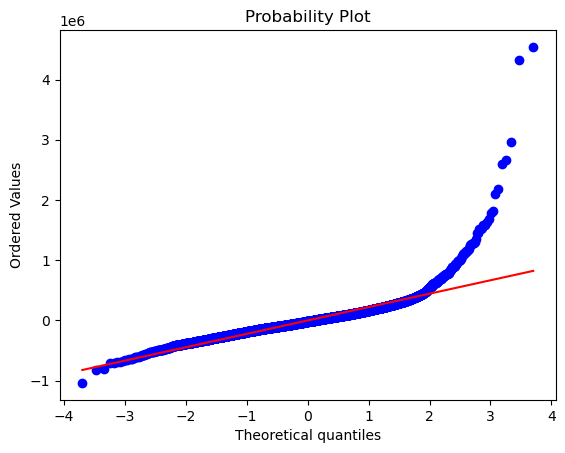

In [41]:
#Probability plot
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

**Explanatory Analysis of the multivariable regression using OLS**

Here is the summary of the Ordinary Least Squares (OLS) regression model fit used to predict house prices (price) based on several features (sqft_living, bathrooms, bedrooms, grade).

 *Here’s an interpretation of the key parts of the output*:

**R-squared and Adjusted R-squared**:

**R-squared**: This statistic measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (sqft_living, bathrooms, bedrooms, grade)

An R-squared of 0.544 indicates that approximately 54.4% of the variability in house prices can be explained by these predictors

**Adjusted R-squared**: This adjusts the R-squared value for the number of predictors in the model. 

It accounts for the model’s degrees of freedom and penalizes the addition of unnecessary variables. Here, both R-squared and Adjusted R-squared are the same, indicating that all variables included in the model contribute to explaining the variance in house prices.



**F-statistic and Prob (F-statistic)**:

**F-statistic**: This tests the overall significance of the regression model. 

A higher F-statistic (6429 in your case) with a very low Prob (F-statistic) value (close to 0.00) suggests that the overall model is statistically significant.

 This means that at least one of the predictors (sqft_living, bathrooms, bedrooms, grade) has a non-zero effect on predicting house prices. 

**Coefficients (coef)**:

Each coefficient represents the estimated change in the dependent variable (price) for a one-unit change in the predictor variable, holding other predictors constant.

For example, sqft_living has a coefficient of 226.9304, meaning that for every additional square foot in living space, the predicted house price increases by approximately $226.93.

**CONCLUSION**

The best feature renovation to increase the pricing of the houses, will be the "sqft_living".
For every additional square foot in living space, the predicted house price increases by approximately $226.93.

Another feature to be considered is the "grade"

Investments that improve the grade of a house, such as high-quality materials, modern designs, and better construction standards, can yield a high return on investment.

For instance, upgrading a house from *a grade of 7 to a grade of 8* could increase its price by nearly $96,740, holding other factors constant.
 This can be particularly important in markets where buyers are willing to pay a premium for higher quality and better design.

## DONE